# **Análisis de Pasajeros Aéreos Mensuales**

## **Carga y visualización de la serie temporal de viajeros**
En esta sección se realiza la carga y el preprocesamiento de una serie temporal que contiene el número de pasajeros aéreos registrados por fecha. El objetivo es convertir los datos diarios en una serie mensual y visualizar la evolución de los viajeros a lo largo del tiempo.

Los pasos que se siguen son los siguientes:

1. **Carga de datos**: se lee el archivo CSV `AirPassengers.csv`, que contiene las fechas y el número de viajeros.
2. **Conversión de fechas**: se transforma la columna **`Fecha`** en un tipo de dato `datetime` para permitir operaciones de serie temporal.
3. **Resampleo mensual**: se agregan los datos a nivel mensual, usando el promedio de los días disponibles.
4. **Filtrado de datos válidos**: se eliminan las filas con valores nulos en la columna `Viajeros`.
5. **Visualización**: se genera un gráfico de líneas que muestra la evolución mensual del número de viajeros a lo largo del tiempo.

Este análisis es útil para entender patrones estacionales, tendencias y **preparar los datos para modelos de predicción de series temporales**.

        Mes       Fecha  Viajeros
0    200801  01/01/2008   1254400
1    200802  01/02/2008   1321600
2    200803  01/03/2008   1478400
3    200804  01/04/2008   1444800
4    200805  01/05/2008   1355200
..      ...         ...       ...
115  201708  01/08/2017   5656000
116  201709  01/09/2017   4524800
117  201710  01/10/2017   4020800
118  201711  01/11/2017   3472000
119  201712  01/12/2017   3774400

[120 rows x 3 columns]


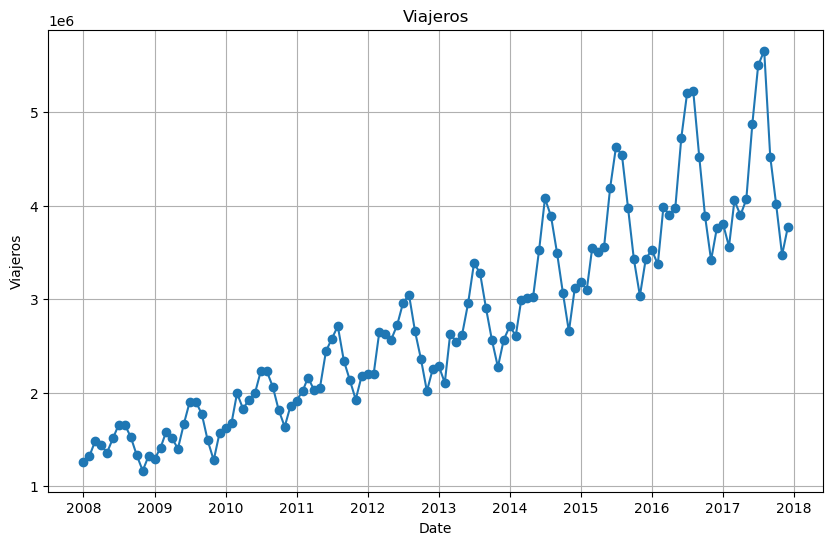

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV.
file_path = "../dataa/AirPassengers.csv"
df = pd.read_csv(file_path, sep=';')
print(df)

# Convertir la columna 'Fecha' a formato de fecha y establecerla como índice.
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df.set_index('Fecha', inplace=True)

# Convertir los datos diarios a datos mensuales tomando el primer día de cada mes.
df_monthly = df.resample('MS').mean().asfreq('MS')

# Eliminar filas con valores NaN en la columna 'Viajeros'.
df_monthly_filtered = df_monthly.dropna(subset=['Viajeros'])

# Graficar la evolución de los viajeros.
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_filtered.index, df_monthly_filtered['Viajeros'], marker='o', linestyle='-')
plt.title('Viajeros')
plt.xlabel('Date')
plt.ylabel('Viajeros')
plt.grid(True)
plt.show()

## **División del conjunto de datos y preparación de la serie temporal.**
En esta sección se realiza la preparación de los datos para el modelado. Específicamente, se dividen los datos en dos subconjuntos:

- **Conjunto de entrenamiento (80%)**: se usa para entrenar el modelo.
- **Conjunto de prueba (20%)**: se usa para evaluar qué tan bien predice el modelo con datos no vistos.

Este proceso es fundamental para validar el rendimiento del modelo de predicción y evitar el sobreajuste.

In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba).
train_size = int(len(df_monthly_filtered) * 0.8)
## Los primeros 80% de los datos se utilizan para el entrenamiento y el resto para la prueba.
train, test = df_monthly_filtered.iloc[:train_size], df_monthly_filtered.iloc[train_size:]

# Ajustar el modelo SARIMA automáticamente.
from pmdarima import auto_arima

## **Búsqueda automática de hiperparámetros para el modelo SARIMA.**
En esta sección se configura y ejecuta el proceso de búsqueda automática de hiperparámetros para el modelo SARIMA, utilizando la función `auto_arima`. Este procedimiento evalúa múltiples combinaciones de parámetros y selecciona la mejor configuración según el criterio de error absoluto medio (MAE).

1. **Frecuencia y estacionalidad**: se establece que los datos son mensuales y que presentan una estacionalidad anual (12 meses).
2. **Selección de columna**: se selecciona la serie temporal correspondiente a la columna `'Viajeros'`.
3. **Rango de hiperparámetros**: se definen los valores iniciales y máximos que el algoritmo puede usar al buscar combinaciones.
4. **Optimización automática**: `auto_arima` explora todas las combinaciones posibles dentro del rango definido y selecciona la que minimiza el error.

In [ ]:
# Establecer la frecuencia de los datos (por ejemplo, 'D' para diario, 'M' para mensual, 'Y' para anual)
frequency = 'M'  # Mensual.

# Definir el número de períodos en una temporada,
seasonal_periods = 12  # Mensual, por lo que hay 12 períodos en un año. Estacionalidad anual.

# Serie temporal univariada.
serie_temporal = df['Viajeros']

# Definir el rango de hiperparámetros para la búsqueda automática.
## Estos valores pueden ajustarse según el problema específico y el conocimiento previo.
## p,d,q son los parámetros del modelo SARIMA, mientras que P,D,Q son los parámetros estacionales.
start_p = 3
d = None # d se determina automáticamente por auto_arima.
start_q = 0
start_P = 0
D = None # D se determina automáticamente por auto_arima.
start_Q = 1
max_p = 3
max_d = 2
max_q = 3
max_P = 0
max_D = 1
max_Q = 1

# Busqueda exhaustiva de hiperparámetros utilizando auto_arima.
## El parámetro seasonal=True indica que se utilizará un modelo SARIMA estacional.
## El parámetro m indica la periodicidad de la estacionalidad.
## El parámetro stepwise=False indica que se realizará una búsqueda exhaustiva de hiperparámetros.
## El parámetro scoring='mae' indica que se utilizará el error absoluto medio como métrica de evaluación.
model = auto_arima(serie_temporal, seasonal=True, m=seasonal_periods, start_p=start_p, d=d, start_q=start_q,
                   start_P=start_P, D=D, start_Q=start_Q, max_p=max_p, max_d=max_d, max_q=max_q, max_P=max_P,
                   max_D=max_D, max_Q=max_Q, stepwise=False, suppress_warnings=True, trace=True,
                   scoring='mae')

# Imprimir los mejores hiperparámetros encontrados por auto_arima
print("Mejores hiperparámetros SARIMA:", model.get_params())

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2924.149, Time=0.00 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2918.138, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=2893.227, Time=0.02 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2887.683, Time=0.10 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=2880.920, Time=0.03 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=2876.145, Time=0.12 sec
 ARIMA(0,0,3)(0,1,0)[12] intercept   : AIC=2878.049, Time=0.03 sec
 ARIMA(0,0,3)(0,1,1)[12] intercept   : AIC=2872.184, Time=0.13 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2904.110, Time=0.03 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=2898.049, Time=0.06 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2903.897, Time=0.02 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=2895.840, Time=0.12 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=2900.529, Time=0.05 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=2892.790, Time=0.13 sec
 ARIMA(1,0,3)(0,1,0)[12] intercept   : AIC=2904.543, Time=0.10

## **Entrenamiento, evaluación y análisis del modelo SARIMA seleccionado.**
En esta sección se ajusta manualmente un modelo SARIMA con los parámetros obtenidos en el paso anterior. Se evalúa su rendimiento en el conjunto de prueba utilizando métricas estadísticas, se visualizan las predicciones comparadas con los datos reales, y se analiza el comportamiento de los residuos para validar la calidad del modelo.

1. **Entrenamiento del modelo SARIMA**: Se entrena un modelo `SARIMA(0, 0, 3)(0, 1, 1, 12)` sobre los datos de entrenamiento. Ese modelo es el elegido por el `auto_arima`.
2. **Predicción y evaluación**: Se realizan predicciones sobre el conjunto de prueba y se calculan métricas como MAE, RMSE y R².
3. **Visualización**: Se comparan gráficamente las predicciones con los datos reales, así como los residuos.
4. **Análisis de residuos**: Se analiza la distribución de los errores residuales para evaluar la calidad del ajuste.

Métricas del Modelo SARIMA (0, 0, 3)(0, 1, 1, 12): (242922352278.03946, 451419.73345911753, 492871.53729753906, 0.44418849298219754)


C:\Users\jvela\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


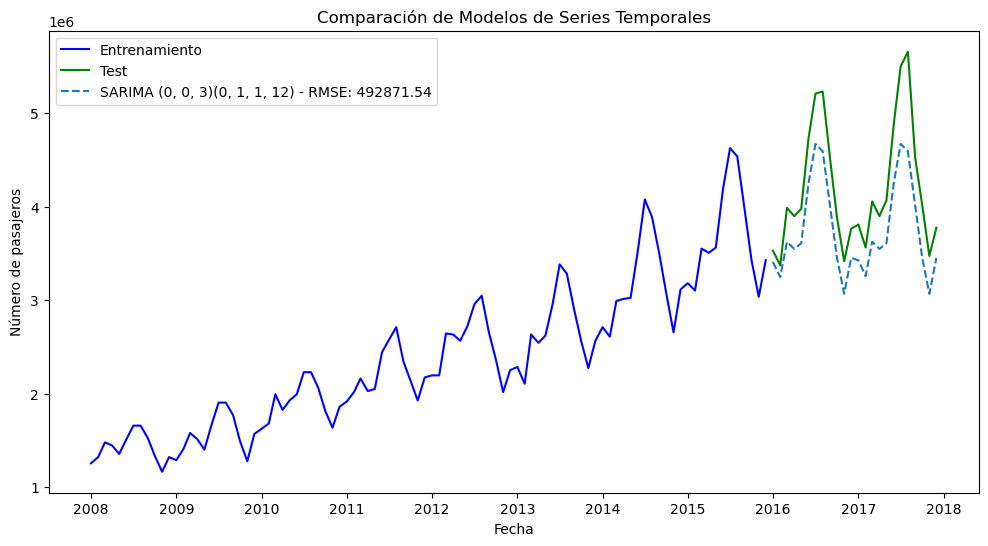

ARIMA - AIC: 2338.0031668398415 BIC: 2350.1572508340582
SARIMA - AIC: 2338.0031668398415 BIC: 2350.1572508340582

Coeficientes SARIMA (0, 0, 3)(0, 1, 1, 12):
                                      SARIMAX Results                                       
Dep. Variable:                             Viajeros   No. Observations:                   96
Model:             SARIMAX(0, 0, 3)x(0, 1, [1], 12)   Log Likelihood               -1164.002
Date:                              Fri, 22 Mar 2024   AIC                           2338.003
Time:                                      13:49:51   BIC                           2350.157
Sample:                                  01-01-2008   HQIC                          2342.889
                                       - 12-01-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

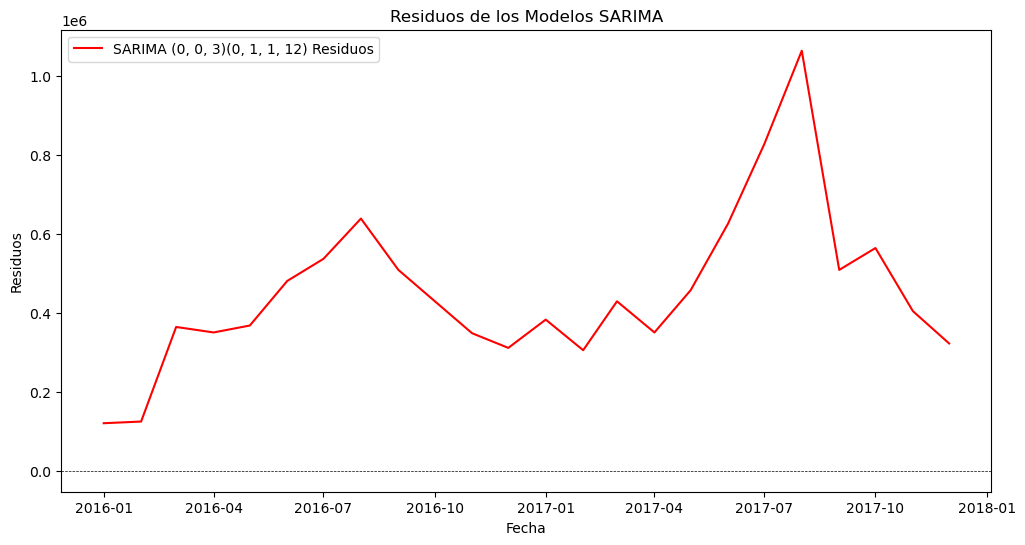

                Fecha  SARIMA (0, 0, 3)(0, 1, 1, 12) Residuos
Fecha                                                        
2016-01-01 2016-01-01                            1.204419e+05
2016-02-01 2016-02-01                            1.246952e+05
2016-03-01 2016-03-01                            3.645295e+05
2016-04-01 2016-04-01                            3.505940e+05
2016-05-01 2016-05-01                            3.681598e+05
2016-06-01 2016-06-01                            4.812494e+05
2016-07-01 2016-07-01                            5.373082e+05
2016-08-01 2016-08-01                            6.393750e+05
2016-09-01 2016-09-01                            5.091939e+05
2016-10-01 2016-10-01                            4.302414e+05
2016-11-01 2016-11-01                            3.486660e+05
2016-12-01 2016-12-01                            3.114647e+05
2017-01-01 2017-01-01                            3.831743e+05
2017-02-01 2017-02-01                            3.055820e+05
2017-03-

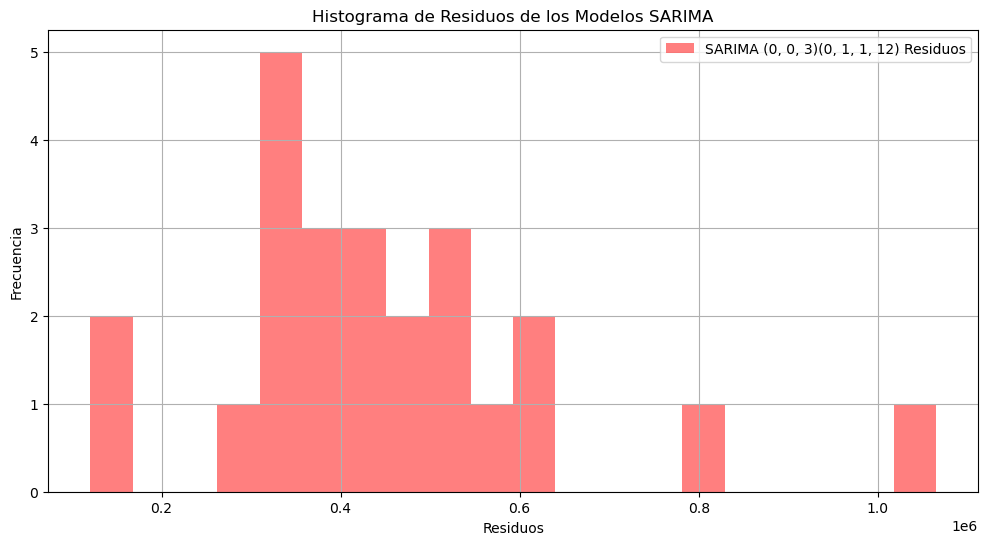

In [ ]:
from statsmodels.tsa.api import ARIMA, SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Entrenar el modelo SARIMA con los mejores hiperparámetros encontrados por auto_arima.
## El modelo SARIMA se ajusta a los datos de TRAIN.
sarima_model2 = SARIMAX(train['Viajeros'], order=(0, 0, 3), seasonal_order=(0, 1, 1, 12))
sarima_fit2 = sarima_model2.fit()
## Predice el rango de fechas del conjunto de prueba: Empieza en el último valor del conjunto de entrenamiento y termina en el último valor del conjunto de prueba.
## typ='levels' indica que se predicen los niveles de la serie temporal, no las diferencias.
## Genera una predicción para cada punto del conjunto de TEST.
sarima_predictions2 = sarima_fit2.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Calcular métricas de validación para cada modelo.
def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

# Calcular las métricas para cada modelo.
sarima_metrics2 = calcular_metricas(test['Viajeros'], sarima_predictions2)

# Imprimir las métricas.
print("Métricas del Modelo SARIMA (0, 0, 3)(0, 1, 1, 12):", sarima_metrics2)

# Visualizar la comparación de los modelos: TRAINING vs TEST y las predicciones de cada modelo.
## Si las líneas están cerca, el modelo es bueno. Si están lejos, hay errores importantes.
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Viajeros'], label='Entrenamiento', color='blue')
plt.plot(test.index, test['Viajeros'], label='Test', color='green')
plt.plot(test.index, sarima_predictions2, label=f'SARIMA (0, 0, 3)(0, 1, 1, 12) - RMSE: {sarima_metrics2[2]:.2f}', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.title('Comparación de Modelos de Series Temporales')
plt.legend()
plt.show()
# Imprimir AIC y BIC.
print("ARIMA - AIC:", sarima_fit2.aic, "BIC:", sarima_fit2.bic)
print("SARIMA - AIC:", sarima_fit2.aic, "BIC:", sarima_fit2.bic)
# Imprimir coeficientes.
print("\nCoeficientes SARIMA (0, 0, 3)(0, 1, 1, 12):")
print(sarima_fit2.summary())

# Análisis de errores: Residuos de cada modelo.
## Los residuos son la diferencia entre los valores reales y los valores predichos por el modelo.
## Un buen modelo tendrá residuos que se distribuyen normalmente alrededor de 0.
sarima_residuals2 = test['Viajeros'] - sarima_predictions2
## Graficar los residuos.
plt.figure(figsize=(12, 6))
plt.plot(test.index, sarima_residuals2, label='SARIMA (0, 0, 3)(0, 1, 1, 12) Residuos', color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.title('Residuos de los Modelos SARIMA')
plt.legend()
plt.show()

## Crear un DataFrame para los residuos.
residuals_df = pd.DataFrame({
    'Fecha': test.index,
   
    'SARIMA (0, 0, 3)(0, 1, 1, 12) Residuos': sarima_residuals2
})
print(residuals_df)

## Graficar un histograma de los residuos.
## Idealmente, se deberia ver una distribución simétrica y centrada en cero, no tiene sesgo (no sobreestima).
plt.figure(figsize=(12, 6))
plt.hist(sarima_residuals2, bins=20, color='red', alpha=0.5, label='SARIMA (0, 0, 3)(0, 1, 1, 12) Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos de los Modelos SARIMA')
plt.legend()
plt.grid(True)
plt.show()

## **Análisis Descriptivo Avanzado: Descomposición de la Serie Temporal.**
Después de evaluar el rendimiento del modelo SARIMA y analizar sus residuos, damos un paso atrás para **comprender la estructura interna de la serie temporal** original. Para ello, realizamos una **descomposición aditiva** que nos permite separar los tres componentes principales de una serie temporal:
1. **Tendencia** (trend): cómo evoluciona el valor promedio a lo largo del tiempo.
2. **Estacionalidad** (seasonal): patrones cíclicos repetitivos (como fluctuaciones mensuales o anuales).
3. **Residuos** (residual): lo que no se puede explicar ni por la tendencia ni por la estacionalidad (ruido).

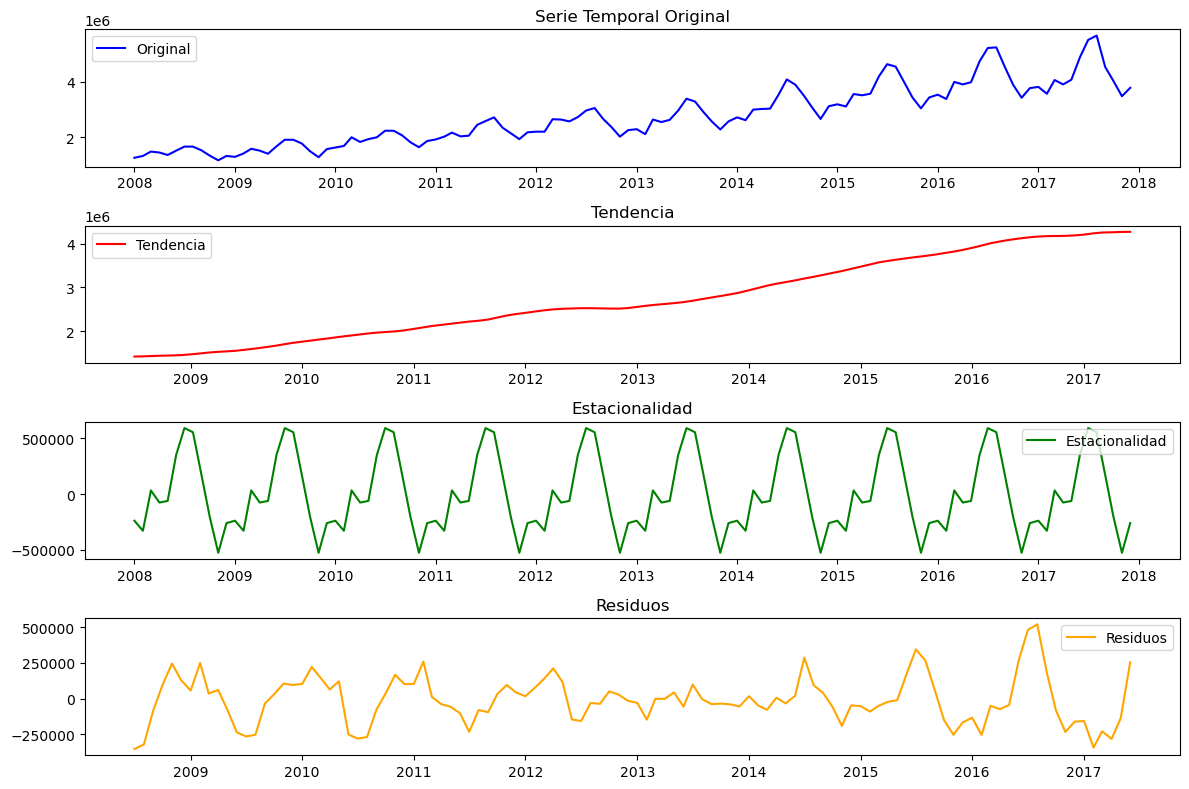

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie temporal.
## La descomposición separa la serie temporal en sus componentes: tendencia, estacionalidad y residuos.
## La descomposición se realiza utilizando el método aditivo.
## Esta elección es adecuada cuando los efectos estacionales y de tendencia son independientes y de magnitudes similares.
decomposition = seasonal_decompose(df['Viajeros'], model='additive')

# Obtención de las componentes.
## Tendencia: Parte de la serie temporal que muestra la dirección general a largo plazo (aumento o disminución).
## Estacionalidad: Parte de la serie temporal que se repite en intervalos regulares (por ejemplo, mensual, trimestral, etc.).
## Residuos: Parte aleatoria de la serie temporal que no se puede explicar por la tendencia o la estacionalidad.
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

# Graficar las componentes
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Viajeros'], label='Original', color='blue')
plt.legend()
plt.title('Serie Temporal Original')

plt.subplot(412)
plt.plot(trend, label='Tendencia', color='red')
plt.legend()
plt.title('Tendencia')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad', color='green')
plt.legend()
plt.title('Estacionalidad')

plt.subplot(414)
plt.plot(residuals, label='Residuos', color='orange')
plt.legend()
plt.title('Residuos')

plt.tight_layout()
plt.show()

### **Conclusiones del Análisis Temporal.**
La descomposición aditiva de la serie temporal de viajeros nos ha permitido **validar visualmente la estructura interna de los datos**, complementando el análisis estadístico y de residuos realizado con el modelo `SARIMA`.

1. **Serie Original**: Se aprecia un claro crecimiento en el número de viajeros a lo largo del tiempo, lo cual justifica la inclusión de un componente de **tendencia** en el modelo.

2. **Tendencia**: La curva de tendencia muestra una evolución positiva sostenida, interrumpida por algunos tramos de estancamiento o ralentización (por ejemplo, hacia 2012 y 2016). Esto refuerza la necesidad de modelar adecuadamente la componente de crecimiento a largo plazo.

3. **Estacionalidad**: Se identifica un patrón estacional muy claro y regular, con picos anuales bien definidos. Este comportamiento es consistente con fenómenos turísticos o de transporte masivo, y valida el uso de un modelo **SARIMA estacional**, como el implementado anteriormente.

4. **Residuos**: La serie residual presenta principalmente valores centrados en cero, aunque con algunos picos a partir de 2015, lo cual sugiere la presencia de eventos atípicos no explicados por la tendencia ni por la estacionalidad. Este resultado se alinea con el histograma de residuos del modelo SARIMA, donde se observaban algunas desviaciones que podrían deberse a shocks externos o errores estructurales menores.

En resumen, la descomposición confirma que nuestra serie temporal está compuesta por una **tendencia creciente clara**, una **estacionalidad fuerte y recurrente**, y una cantidad razonable de **ruido aleatorio**. Esto justifica plenamente el uso de un modelo SARIMA con componente estacional, y también sugiere que los residuos del modelo, aunque en su mayoría aleatorios, podrían mejorarse con el uso de enfoques más robustos o modelos híbridos en futuros desarrollos.

## **Predicción de los próximos 12 meses con modelo SARIMA.**
Tras validar que el modelo SARIMA (0, 0, 3)(0, 1, 1, 12) es adecuado para nuestros datos históricos, procedemos a utilizarlo para generar una **predicción a 12 meses vista**. Esta proyección nos permitirá anticipar el comportamiento esperado del número de viajeros para el siguiente año, considerando la estacionalidad y la tendencia observada en la serie.

La siguiente gráfica muestra en azul los datos históricos reales y en rojo discontinuo la predicción para los próximos 12 meses.

C:\Users\jvela\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jvela\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jvela\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


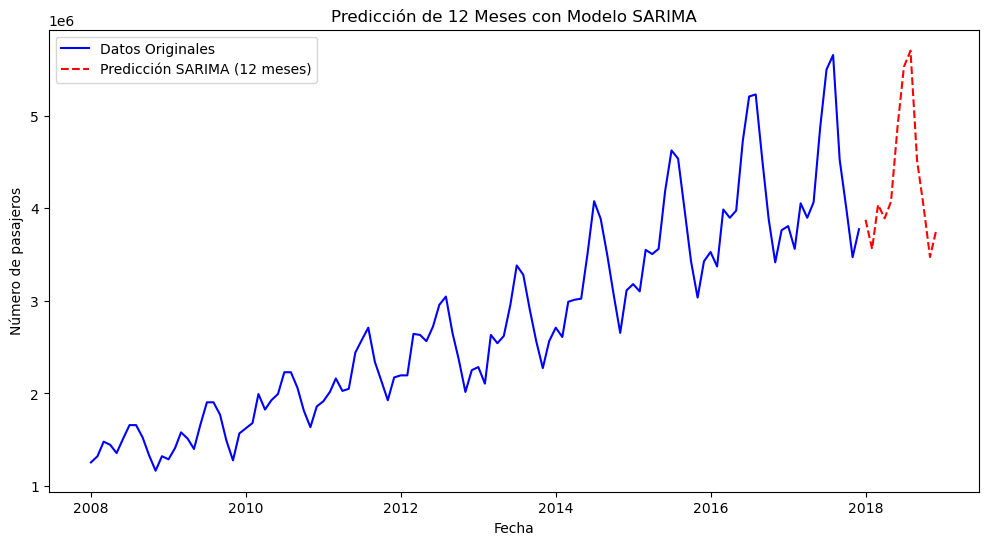

In [ ]:
# Ajustar el modelo SARIMA a todos los datos.
sarima_model = SARIMAX(df['Viajeros'], order=(0, 0, 3), seasonal_order=(0, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Realizar la predicción de los próximos 12 meses.
start_date = df.index[-1] + pd.DateOffset(months=1)
end_date = start_date + pd.DateOffset(months=11)
sarima_predictions_12months = sarima_fit.predict(start=start_date, end=end_date, typ='levels')

# Graficar las predicciones de los próximos 12 meses.
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Viajeros'], label='Datos Originales', color='blue')
plt.plot(sarima_predictions_12months.index, sarima_predictions_12months, label='Predicción SARIMA (12 meses)', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.title('Predicción de 12 Meses con Modelo SARIMA')
plt.legend()
plt.show()

## **Predicción de los próximos 13 meses con intervalos de confianza.**
Con el modelo SARIMA ajustado, generamos una predicción a 13 meses que incluye **intervalos de confianza al 95%**, permitiendo estimar no solo la evolución esperada del número de pasajeros, sino también el margen de variabilidad que podrían tener esas estimaciones. Esto es especialmente útil para la toma de decisiones bajo incertidumbre.

La siguiente gráfica muestra:
- Los datos históricos en azul.
- La predicción media en rojo discontinuo.
- La banda de incertidumbre (intervalo de confianza) en rosa.

C:\Users\jvela\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jvela\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


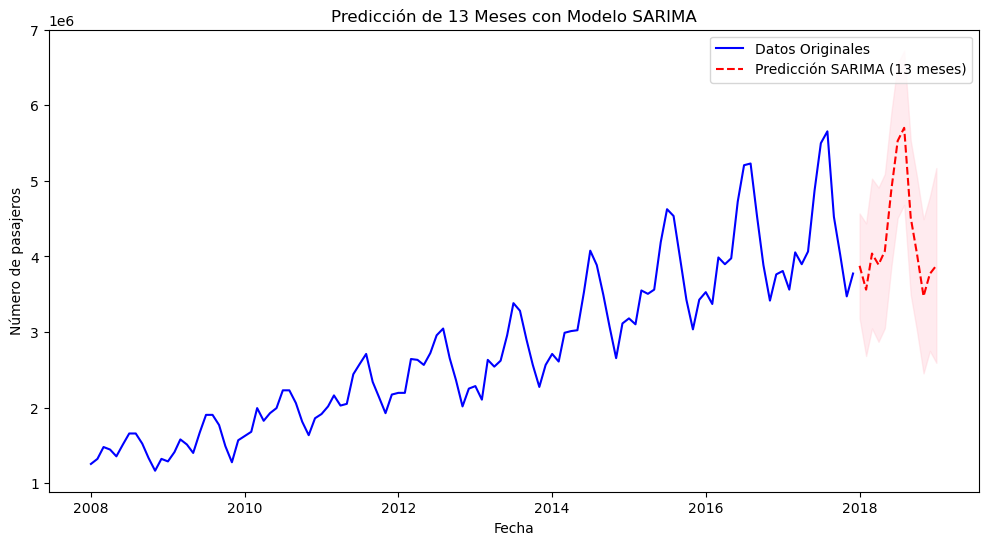

In [ ]:
# Ajustar el modelo SARIMA a todos los datos.
sarima_model = SARIMAX(df['Viajeros'], order=(0, 0, 3), seasonal_order=(0, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Obtener predicciones y sus intervalos de confianza para los próximos 12 meses.
## El método get_forecast() devuelve un objeto que contiene las predicciones y sus intervalos de confianza.
forecast = sarima_fit.get_forecast(steps=13)  # Predicción de 13 meses en total.
forecast_values = forecast.predicted_mean # Media de las predicciones. Predicciones puntuales.
confidence_intervals = forecast.conf_int() # Intervalos de confianza para las predicciones.

# Graficar las predicciones de los próximos 13 meses con intervalo de confianza.
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Viajeros'], label='Datos Originales', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Predicción SARIMA (13 meses)', color='red', linestyle='--')
plt.fill_between(forecast_values.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.title('Predicción de 13 Meses con Modelo SARIMA')
plt.legend()
plt.show()

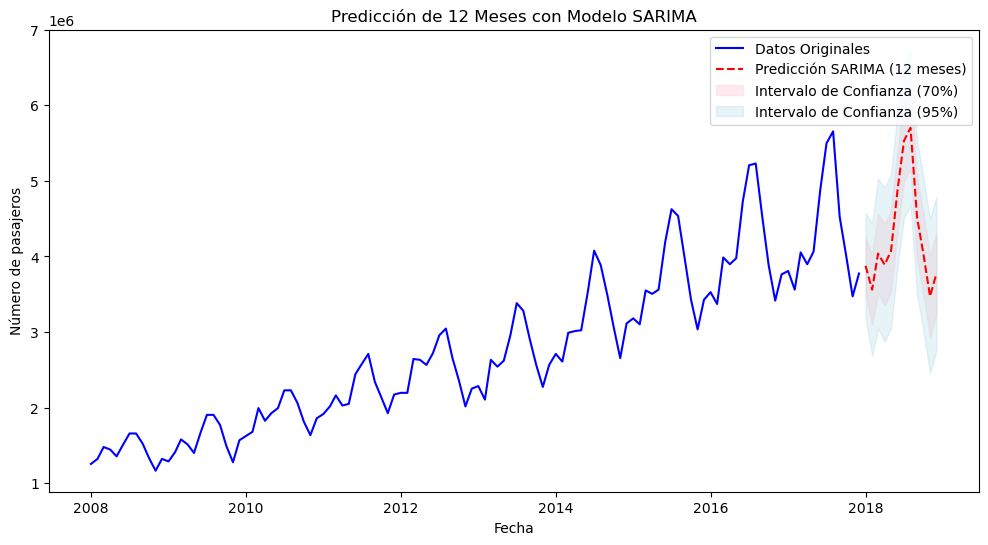

In [ ]:
# Obtener los intervalos de confianza del 70% y 95%.
confidence_intervals_70 = sarima_fit.get_forecast(steps=12).conf_int(alpha=0.3)
confidence_intervals_95 = sarima_fit.get_forecast(steps=12).conf_int(alpha=0.05)

# Graficar las predicciones de los próximos 12 meses con intervalo de confianza.
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Viajeros'], label='Datos Originales', color='blue')
plt.plot(sarima_predictions_12months.index, sarima_predictions_12months, label='Predicción SARIMA (12 meses)', color='red', linestyle='--')
plt.fill_between(sarima_predictions_12months.index, confidence_intervals_70.iloc[:, 0], confidence_intervals_70.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confianza (70%)')
plt.fill_between(sarima_predictions_12months.index, confidence_intervals_95.iloc[:, 0], confidence_intervals_95.iloc[:, 1], color='lightblue', alpha=0.3, label='Intervalo de Confianza (95%)')
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.title('Predicción de 12 Meses con Modelo SARIMA')
plt.legend()
plt.show()